In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model


In [2]:
# Reading in data and dropping headings 

data_path  = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv")
crimes = pd.read_csv(data_path, header=None)
crimes = crimes.drop([0,1,2,3])

In [3]:
#cleaning the data - will create functions next time 


# changing title of column
crimes['city'] = crimes[0]
crimes['population'] = crimes[1]
crimes['violent\ncrime'] = crimes[2]
crimes['Murder and\nnonnegligent\nmanslaughter'] = crimes[3]
crimes['Rape\n(revised\ndefinition)1'] = crimes[4]
crimes['Rape\n(legacy\ndefinition)2'] = crimes[5]
crimes['Robbery'] = crimes[6]
crimes['Aggravated\nassault'] = crimes[7]
crimes['Property\ncrime'] = crimes[8]
crimes['Burglary'] = crimes[9]
crimes['Larceny-\ntheft'] = crimes[10]
crimes['Motor\nvehicle\ntheft'] = crimes[11]
crimes['Arson3'] = crimes[12]
                        
crimes



,0,1,2,3,4,5,6,7,8,9,...,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,...,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,...,0,NaN,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,...,0,NaN,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,...,0,NaN,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,...,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,...,0,NaN,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,...,0,NaN,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,NaN,0,0,3,10,0,...,0,NaN,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,NaN,7,31,68,"2,118",204,...,1,NaN,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,NaN,2,4,3,210,16,...,0,NaN,2,4,3,210,16,188,6,1


In [4]:
# Removing old col without labels 
crimes = crimes.drop(0,axis=1)
crimes = crimes.drop(1,axis=1)
crimes = crimes.drop(2,axis=1)
crimes = crimes.drop(3,axis=1)
crimes = crimes.drop(4,axis=1)
crimes = crimes.drop(5,axis=1)
crimes = crimes.drop(6,axis=1)
crimes = crimes.drop(7,axis=1)
crimes = crimes.drop(8,axis=1)
crimes = crimes.drop(9,axis=1)
crimes = crimes.drop(10,axis=1)
crimes = crimes.drop(11,axis=1)
crimes = crimes.drop(12,axis=1)
crimes = crimes.drop('Rape\n(revised\ndefinition)1',axis=1)

In [5]:
crimes

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
8,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
9,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN
10,Alfred Village,"4,089",5,0,0,3,2,46,10,36,0,NaN
11,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1


In [6]:
crimes = crimes.drop([4])

In [7]:
#drop missing values 
crimes = crimes.dropna()
crimes

,city,population,violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
5,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0
6,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0
7,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0
11,Allegany Village,"1,781",3,0,0,0,3,10,0,10,0,0
12,Amherst Town,"118,296",107,1,7,31,68,"2,118",204,"1,882",32,3
13,Amityville Village,"9,519",9,0,2,4,3,210,16,188,6,1
14,Amsterdam,"18,182",30,0,0,12,18,405,99,291,15,0
15,Arcade Village,"2,053",0,0,0,0,0,39,3,35,1,0
16,Ardsley Village,"4,523",5,0,0,3,2,33,4,28,1,0
17,Asharoken Village,658,0,0,0,0,0,2,0,2,0,0


In [8]:
# Data cleaning

#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in crimes.columns:
    crimes[col]= crimes[col].apply(lambda x: str(x).replace(',', ''))
    crimes[col]= crimes[col].apply(lambda x: str(x).strip())

#Convert str and objects to float 
numerical_crimes = crimes.columns[1:]
for num_col in numerical_crimes:
    crimes[num_col]= crimes[num_col].apply(lambda x: float(x))

In [9]:
#checkign the types of the columns to make sure they are ready for graphing 
crimes.dtypes


city                                       object
population                                float64
violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Arson3                                    float64
dtype: object

AxesSubplot(0.125,0.125;0.775x0.755)


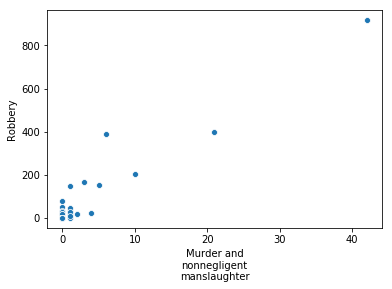

In [10]:
#Visualizing the ataset 
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['Robbery']))


AxesSubplot(0.125,0.125;0.775x0.755)


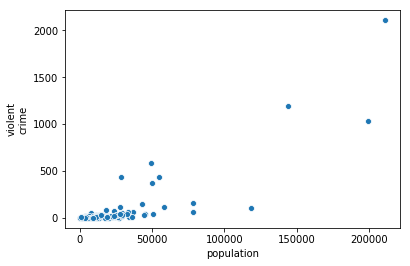

In [11]:
print(sns.scatterplot(x=crimes['population'], y=crimes['violent\ncrime']))


AxesSubplot(0.125,0.125;0.775x0.755)


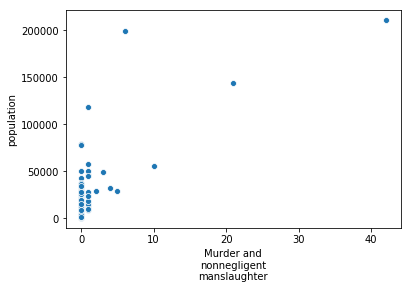

In [12]:
print(sns.scatterplot(x=crimes['Murder and\nnonnegligent\nmanslaughter'], y=crimes['population']))
# I will keep the outlying values because they correspond with population  

In [13]:

#Feature Engineering 
crimes['Robbery_conditon'] = crimes['Robbery'].apply(lambda x: 1 if x > 0 else 0)
crimes['Murder_condition'] = crimes['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 1 if x > 0 else 0)
crimes['pop_squared'] = crimes['population'] * crimes['population']
crimes['murder_condition_squared'] = crimes['Murder_condition']* crimes['Murder_condition']

crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']



#Additional features 

#crimes['Arson/robbery'] = int(crimes['Arson3'])/int(crimes['Robbery'])
#crimes['violentcrime/pop'] = int(crimes['violent crime'])/int(['populations'])
crimes['nonviolentcrime'] = crimes['Larceny-\ntheft'] * crimes['Burglary']
#featues for model 
crimes['murder_pop'] = crimes['Murder and\nnonnegligent\nmanslaughter']/crimes['population']
crimes['Robbery_pop'] = crimes['Robbery'] / crimes['population']
crimes['murder_robbery'] = crimes['Robbery']/crimes['Murder and\nnonnegligent\nmanslaughter']







AxesSubplot(0.125,0.125;0.775x0.755)


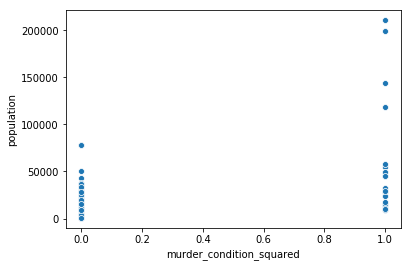

In [14]:
print(sns.scatterplot(x=crimes['murder_condition_squared'], y=crimes['population']))

In [98]:
from sklearn.metrics import mean_squared_error
# Fitting the model 
#'nonviolentcrime']
regr = linear_model.LinearRegression()
Y = crimes['Property\ncrime'].values.reshape(-1, 1)
X = crimes[['population','Robbery_conditon','Murder_condition']]
regr.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

print('With 30% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=10))


#RSME 
modelPred = regr.predict(X)
#print(modelPred)

#print("Number of predictions:",len(modelPred))

meanSquaredError = mean_squared_error(Y, modelPred)

rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

# Model results 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

With 30% Holdout: 0.7168643197422946
Testing on Sample: 0.7576739665411549
[ 0.35303674  0.87014508  0.05918972  0.62983165 -0.08218529  0.48107173
  0.63004141  0.69943153  0.83761708 -2.24329531]
RMSE: 473.8545343356176

Coefficients: 
 [[ 3.07302819e-02 -7.64085533e+01  9.90969735e+01]]

Intercept: 
 [-87.30675172]

R-squared:
0.7576739665411549


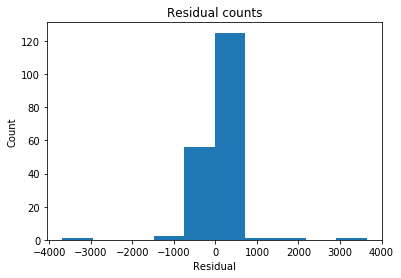

,population,Robbery_conditon,Murder_condition
population,1.000000,0.387305,0.558612
Robbery_conditon,0.387305,1.000000,0.353780
Murder_condition,0.558612,0.353780,1.000000


In [99]:
# checking residuals, somewhat normally distributed, slightly right skewed 

predicted = regr.predict(X).ravel()
actual = crimes['Property\ncrime']

# Calculating the residual 
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# Low correlation among features 
correlation_matrix = X.corr()
display(correlation_matrix)

In [109]:
# KNN
from sklearn import neighbors

YY = crimes['Property\ncrime'].values.reshape(-1, 1)
XX = crimes[['population','Robbery_conditon','Murder_condition']]

# Unweighted, weight lowers accuracy of this model 
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(XX, YY)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [111]:
from sklearn.model_selection import cross_val_score
# Unweighted result improved 


# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3, random_state=10)

print('With 30% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(XX, YY).score(XX, YY)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, XX, YY, cv=10))

print('\nR-squared:')
print(knn.score(XX, YY))







With 30% Holdout: 0.7168643197422946
Testing on Sample: 0.7576739665411549
[0.98888688 0.71741313 0.41134539 0.71067306 0.50929497 0.70137954
 0.42679436 0.36615517 0.63185842 0.81713783]

R-squared:
0.603684290007946


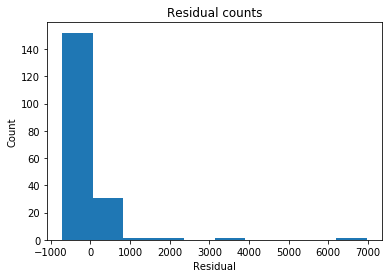

In [114]:
# checking residuals, heavily right skewed 

predicted = knn.predict(XX).ravel()
actual = crimes['Property\ncrime']

# Calculating the residual 
residual =  actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Write Up 
While both models have a smililar preformance, regarding holdout and testing results, they differ in regards to 
their r^2 value. The knn model explains 61% of the variablity in the data while the ols explains 94% of the variablity, suggesting that the ols model fits the data better. The residual plot reveal that the errors of the ols plot have a more normal distribution while the residual plot for the knn model is heavily right skewed. The datas density may have influence the knn model's inaccurate predictions. 

